In [ ]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [ ]:
import matplotlib.pyplot as plt

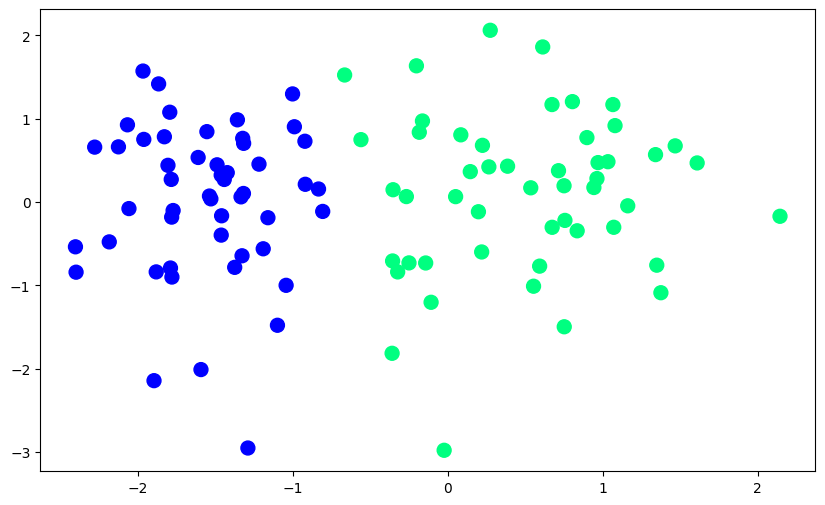

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [ ]:
def perceptron(X,y):

    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]

    return weights[0],weights[1:]

In [ ]:
def step(z):
    return 1 if z>0 else 0

In [ ]:
intercept_,coef_ = perceptron(X,y)

In [ ]:
print(coef_)
print(intercept_)

[1.31871192 0.22098031]
1.0


In [ ]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [ ]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

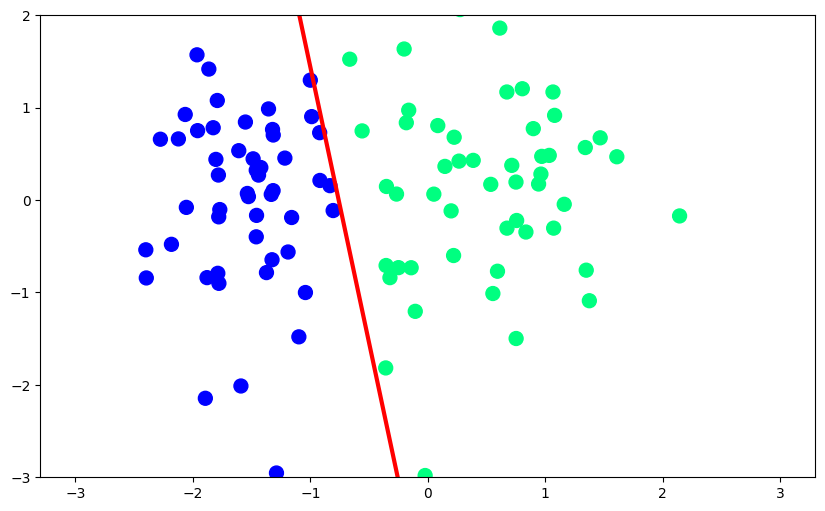

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os

# Dummy data for demonstration
np.random.seed(0)
X = np.random.randn(100, 2)
y = (X[:, 0] > 0).astype(int)  # Simple binary target

def step(x):
    return 1 if x >= 0 else 0

def perceptron(X, y):
    m = []
    b = []
    X = np.insert(X, 0, 1, axis=1)  # Add bias term
    weights = np.ones(X.shape[1])
    lr = 0.1
    for i in range(200):
        j = np.random.randint(0, len(X))  # Random index for training
        y_hat = step(np.dot(X[j], weights))
        weights = weights + lr * (y[j] - y_hat) * X[j]
        m.append(-(weights[1] / weights[2]))  # slope
        b.append(-(weights[0] / weights[2]))  # intercept
    return m, b

m, b = perceptron(X, y)

# Prepare to save frames for the GIF
filenames = []

for i in range(len(m)):
    plt.figure(figsize=(9, 5))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)

    x_i = np.arange(-3, 3, 0.1)
    y_i = x_i * m[i] + b[i]
    plt.plot(x_i, y_i, 'r-', linewidth=2)

    plt.ylim(-3, 3)
    plt.title(f'Epoch {i+1}')
    plt.xlabel('X1')
    plt.ylabel('X2')

    # Save the current plot as a file
    filename = f'frame_{i}.png'
    plt.savefig(filename)
    plt.close()  # Close the plot to avoid displaying it in the notebook
    filenames.append(filename)

# Create a GIF from the saved frames
with imageio.get_writer('perceptron_animation.gif', mode='I', duration=0.1) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Clean up the images
for filename in filenames:
    os.remove(filename)

# Display the GIF
from IPython.display import Image
Image(filename='perceptron_animation.gif')


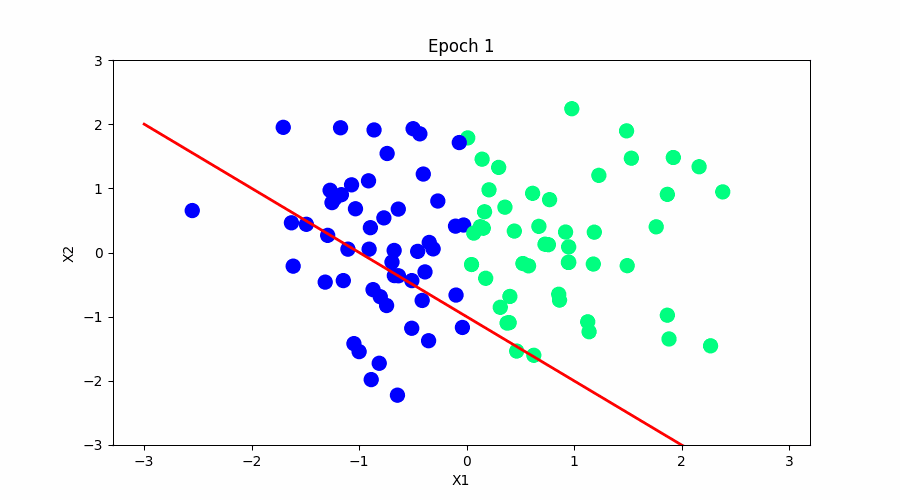

In [ ]:
# Display the GIF
from IPython.display import Image
Image(filename='perceptron_animation.gif')